In [51]:
import pandas as pd

#create DataFrame
df = pd.DataFrame({'x': [1.9, 1, 2, 3, 4, 4, 5, 5, 6, 7, 7, 8, 8, 9, 10, 10,
                         11, 12, 12, 13, 14, 15, 15, 16, 17, 18, 18, 19, 20, 20],
                   'y': [3, 5, 6, 10, 13, 15, 17, 14, 20, 23, 25, 27, 30, 30, 31,
                         33, 32, 32, 30, 32, 34, 34, 37, 35, 34, 36, 34, 37, 38, 36]})

#view first five rows of DataFrame
df.head()

,x,y
0,1.9,3
1,1.0,5
2,2.0,6
3,3.0,10
4,4.0,13


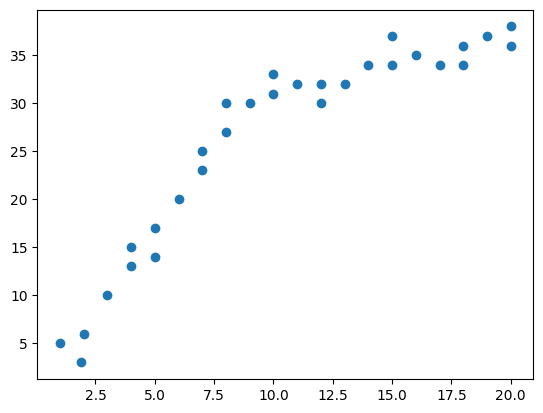

In [52]:
import matplotlib.pyplot as plt

#create scatterplot
plt.plot(df.x, df.y, 'o')

In [53]:
from chow_test import chow_test

In [54]:
type(df.iloc[:]['y'])

pandas.core.series.Series

In [55]:
chow_test(y_series=df.iloc[:]['y'], X_series=df.iloc[:]['x'],
         last_index=15,
         first_index=16,
         significance=.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 97.34688099157955, P_value: 1.5905055050779993e-12


(97.34688099157955, 1.5905055050779993e-12)

In [32]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import LinearAxis, Range1d
import pandas as pd

import pandas as pd
import numpy as np
import pandas_bokeh
import os
import sys
sys.path.append('./data_analysis')

if 'data_analysis' in os.getcwd():
    data_folder = '../data/'
else:
    data_folder = './data/'

source_folder_path = data_folder + 'trips/analysis/'
destination_folder_path = data_folder + 'charts/'
covid_data = pd.read_csv(data_folder + 'covid/treated_data/data.csv')

trips = pd.read_csv(source_folder_path + 'trips_grouped_by_month_mean.csv')

from modules.DataPreparation import DataPreparation
dp = DataPreparation()

covid_data = dp.transform_to_datetime(covid_data, ['date'])
covid_data = dp.transform_to_time_series(covid_data, 'date', drop=True)

trips = dp.transform_to_datetime(trips, ['date'])
trips = dp.transform_to_time_series(trips, 'date', drop = True)

trips_and_covid = pd.merge(trips, covid_data, left_index=True,
                            right_index=True, how = 'left')

trips_and_covid['date_trips'] = trips_and_covid.index

In [56]:
trips.head()

,number_of_trips,tripduration,hour,age,week_day,weekend,holiday
date,,,,,,,
2018-01-01,57.000000,3585.398001,15.247060,NaN,3.000000,0.333333,0.000000
2018-02-01,476.571429,2237.209127,13.638006,NaN,3.000000,0.285714,0.071429
2018-03-01,802.870968,2569.867173,13.008217,NaN,3.096774,0.290323,0.032258
2018-04-01,1079.533333,2024.101274,13.361577,NaN,3.000000,0.300000,0.066667
2018-05-01,2215.967742,1975.162249,13.470241,NaN,2.903226,0.258065,0.064516


In [58]:
trips.reset_index()

,date,number_of_trips,tripduration,hour,age,week_day,weekend,holiday
0,2018-01-01,57.000000,3585.398001,15.247060,NaN,3.000000,0.333333,0.000000
1,2018-02-01,476.571429,2237.209127,13.638006,NaN,3.000000,0.285714,0.071429
2,2018-03-01,802.870968,2569.867173,13.008217,NaN,3.096774,0.290323,0.032258
3,2018-04-01,1079.533333,2024.101274,13.361577,NaN,3.000000,0.300000,0.066667
4,2018-05-01,2215.967742,1975.162249,13.470241,NaN,2.903226,0.258065,0.064516
5,2018-06-01,3083.600000,2101.515148,13.626468,NaN,3.100000,0.300000,0.000000
6,2018-07-01,3614.419355,2293.300753,13.576444,NaN,2.935484,0.290323,0.032258
7,2018-08-01,4430.935484,2766.196377,13.593908,NaN,3.000000,0.258065,0.000000
8,2018-09-01,5383.333333,2135.990251,13.643139,NaN,3.166667,0.333333,0.033333
9,2018-10-01,5327.806452,1631.979458,14.087414,NaN,2.806452,0.258065,0.032258


<AxesSubplot:xlabel='date'>

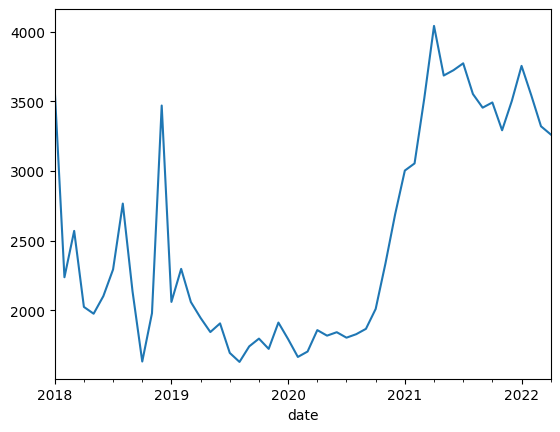

In [38]:
trips['tripduration'].plot()

In [59]:
trips_t = trips.reset_index()

In [60]:
pd.Series(trips_t['tripduration'])

0     3585.398001
1     2237.209127
2     2569.867173
3     2024.101274
4     1975.162249
5     2101.515148
6     2293.300753
7     2766.196377
8     2135.990251
9     1631.979458
10    1978.760698
11    3470.338193
12    2060.186448
13    2297.233179
14    2059.061130
15    1944.900563
16    1843.465859
17    1905.679334
18    1693.558292
19    1628.950412
20    1740.652836
21    1796.326887
22    1722.588382
23    1911.624855
24    1792.484978
25    1664.650080
26    1703.564246
27    1857.467596
28    1817.646573
29    1842.382151
30    1803.096096
31    1828.110106
32    1866.475558
33    2009.330596
34    2333.952735
35    2688.456632
36    3003.339638
37    3054.650290
38    3522.400400
39    4042.136346
40    3685.918351
41    3724.056162
42    3773.455292
43    3553.069971
44    3455.039560
45    3492.441402
46    3292.638223
47    3503.159021
48    3755.116782
49    3543.941367
50    3321.339139
51    3262.739006
Name: tripduration, dtype: float64

In [50]:
pd.Series(trips['tripduration'])

date
2018-01-01    3585.398001
2018-02-01    2237.209127
2018-03-01    2569.867173
2018-04-01    2024.101274
2018-05-01    1975.162249
2018-06-01    2101.515148
2018-07-01    2293.300753
2018-08-01    2766.196377
2018-09-01    2135.990251
2018-10-01    1631.979458
2018-11-01    1978.760698
2018-12-01    3470.338193
2019-01-01    2060.186448
2019-02-01    2297.233179
2019-03-01    2059.061130
2019-04-01    1944.900563
2019-05-01    1843.465859
2019-06-01    1905.679334
2019-07-01    1693.558292
2019-08-01    1628.950412
2019-09-01    1740.652836
2019-10-01    1796.326887
2019-11-01    1722.588382
2019-12-01    1911.624855
2020-01-01    1792.484978
2020-02-01    1664.650080
2020-03-01    1703.564246
2020-04-01    1857.467596
2020-05-01    1817.646573
2020-06-01    1842.382151
2020-07-01    1803.096096
2020-08-01    1828.110106
2020-09-01    1866.475558
2020-10-01    2009.330596
2020-11-01    2333.952735
2020-12-01    2688.456632
2021-01-01    3003.339638
2021-02-01    3054.650290
2021-03

In [63]:
chow_test(y_series=pd.Series(trips_t['tripduration']),
            X_series=pd.Series(trips_t.index),
            last_index=26,
            first_index=27,
            significance=0.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 30.534601535991424, P_value: 3.1790976517953595e-09


(30.534601535991424, 3.1790976517953595e-09)

In [65]:
chow_test(y_series=pd.Series(trips_t['tripduration']),
            X_series=pd.Series(trips_t.index),
            last_index=10,
            first_index=11,
            significance=0.05)

Reject the null hypothesis of equality of regression coefficients in the two periods.
Chow Statistic: 10.708071275831845, P_value: 0.00014725597833586956


(10.708071275831845, 0.00014725597833586956)

In [62]:
trips_t

,date,number_of_trips,tripduration,hour,age,week_day,weekend,holiday
0,2018-01-01,57.000000,3585.398001,15.247060,NaN,3.000000,0.333333,0.000000
1,2018-02-01,476.571429,2237.209127,13.638006,NaN,3.000000,0.285714,0.071429
2,2018-03-01,802.870968,2569.867173,13.008217,NaN,3.096774,0.290323,0.032258
3,2018-04-01,1079.533333,2024.101274,13.361577,NaN,3.000000,0.300000,0.066667
4,2018-05-01,2215.967742,1975.162249,13.470241,NaN,2.903226,0.258065,0.064516
5,2018-06-01,3083.600000,2101.515148,13.626468,NaN,3.100000,0.300000,0.000000
6,2018-07-01,3614.419355,2293.300753,13.576444,NaN,2.935484,0.290323,0.032258
7,2018-08-01,4430.935484,2766.196377,13.593908,NaN,3.000000,0.258065,0.000000
8,2018-09-01,5383.333333,2135.990251,13.643139,NaN,3.166667,0.333333,0.033333
9,2018-10-01,5327.806452,1631.979458,14.087414,NaN,2.806452,0.258065,0.032258


<AxesSubplot:xlabel='date'>

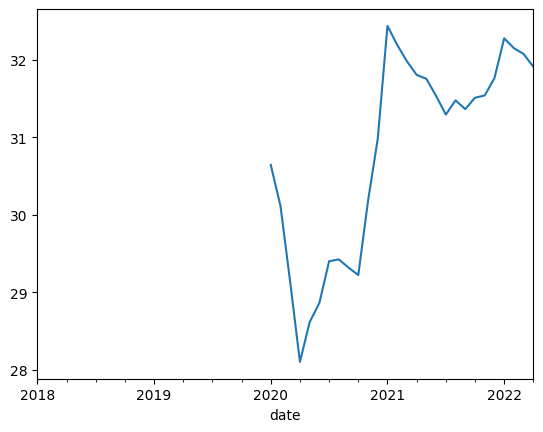

In [66]:
trips['age'].plot()